In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

,Steming,Label
0,lupa gagal tuan rumah piala dunia mari tata se...,negatif
1,gagal helat piala dunia indonesia jadi alam de...,positif
2,citra bela palestina guna syal palestina baca ...,negatif
3,tuan rumah piala dunia bentar tuan rumah wbg,netral
4,ketua erick thohir alas fifa batal posisi indo...,netral
...,...,...
14802,piala dunia batal gelar indonesia,netral
14803,juang indonesia tuan rumah piala dunia siasia,negatif
14804,guru indonesia tuan rumah piala dunia nasib sa...,netral
14805,main timnas indonesia ramai ramai tumpah kecew...,negatif


In [3]:
pd.value_counts(df['Label'])

negatif    6769
positif    4946
netral     3092
Name: Label, dtype: int64

## Split Dataset

In [24]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.1, random_state = 0)


In [25]:
# Membuat data frame dari hasil split
df_train = pd.DataFrame()
df_train['Steming'] = train_X
df_train['Label'] = train_Y

df_test10 = pd.DataFrame()
df_test10['Steming'] = test_X
df_test10['Label'] = test_Y

In [26]:
#Data frame train hasil pembagian 
df_train

,Steming,Label
4891,aksi duka korban kanjuruhan gagal tuan rumah p...,negatif
223,orang rasa sakit hatinyakalo usaha lebar kaykk...,negatif
14457,dibayangin piala dunia feelnya kek pildun asli...,positif
8023,indonesia gagal tuan rumah piala dunia suharto...,negatif
4837,tragedi kanjuruhan piala dunia tanggap interna...,negatif
...,...,...
13123,indonesia batal tuan rumah piala dunia bukti b...,negatif
3264,piala dunia bangkit sepak bola indonesia hancu...,positif
9845,apa laksana final piala dunia laksana indonesi...,negatif
10799,klik bola gol berita kini nyata presiden jokow...,positif


In [27]:
#Data Frame test Hasil Pembagian
df_test10

,Steming,Label
3017,lapang kerja potensi putar uang gera garagara ...,positif
14806,politikus budiman sudjatmiko tolak timnas isra...,positif
3299,juang erick thohir apresiasi keringat air mata...,positif
7443,arah jokowi coret ri tuan rumah piala dunia,netral
12133,batal piala dunia main politik pk mancing kepa...,netral
...,...,...
8688,indonesia negara gagal tuan rumah piala dunia,negatif
8968,reaksi ganjar koster piala dunia batal indonesia,netral
11074,ri batal tuan rumah piala dunia kiai maruf pat...,positif
12289,pegang lisensi merchandise piala dunia kena da...,netral


In [28]:
df_test10.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/df_test10.csv')

## Pembobotan TF-IDF

In [29]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['Steming'])
train_X_tfidf = tfidf_vect.transform(df_train['Steming'])
test_X_tfidf_10 = tfidf_vect.transform(df_test10['Steming'])

In [30]:
#melihat hasil pembobotan TF-IDF pada data train
print(train_X_tfidf)


  (0, 9323)	0.15914734511827014
  (0, 7686)	0.15974929678819166
  (0, 6940)	0.08394804183562023
  (0, 4551)	0.5079202482966009
  (0, 4031)	0.36025603356979863
  (0, 2587)	0.2427798675020433
  (0, 2146)	0.08381209237341544
  (0, 2129)	0.49299520741280956
  (0, 177)	0.49530477204647044
  (1, 9939)	0.19460145507801424
  (1, 9931)	0.201303525611128
  (1, 9753)	0.2796446594616244
  (1, 9589)	0.1554943818410386
  (1, 9399)	0.2547146742727458
  (1, 8748)	0.20062710663778222
  (1, 8215)	0.1489288448683442
  (1, 7774)	0.3604653720593819
  (1, 7562)	0.2073602960838688
  (1, 7437)	0.17531746547845384
  (1, 7156)	0.25078578952511005
  (1, 6940)	0.02957233026872389
  (1, 6458)	0.14813204373331396
  (1, 6419)	0.21499587568610554
  (1, 6004)	0.1770658765880164
  (1, 4830)	0.2547146742727458
  :	:
  (13324, 7187)	0.17255794735183197
  (13324, 6940)	0.04504019662865286
  (13324, 6317)	0.21792974704408552
  (13324, 4408)	0.3035735137824341
  (13324, 4366)	0.30556551512480284
  (13324, 4208)	0.2497178249

In [31]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_10)

  (0, 9424)	0.26066953234988866
  (0, 8672)	0.23423457162099068
  (0, 8525)	0.3504609394288991
  (0, 8162)	0.20050438643956053
  (0, 7331)	0.2729001685128544
  (0, 7123)	0.21527800895750324
  (0, 6940)	0.03891918591005691
  (0, 6621)	0.2583219915296451
  (0, 6507)	0.35689149003129245
  (0, 5960)	0.1647851754500186
  (0, 4792)	0.2495297447834159
  (0, 4269)	0.2223879640373007
  (0, 3912)	0.25539814546778794
  (0, 2756)	0.3112509460741837
  (0, 2661)	0.23946352281187164
  (0, 2146)	0.03885615832444293
  (0, 135)	0.19465731462621114
  (1, 9210)	0.20885910411352815
  (1, 9141)	0.16403970027001893
  (1, 8609)	0.6057597350980152
  (1, 7084)	0.41821735326723036
  (1, 6940)	0.061437879229306595
  (1, 5103)	0.2111696353327572
  (1, 3593)	0.18238545282025287
  (1, 2146)	0.061338383797875554
  :	:
  (1478, 5242)	0.4467377443165584
  (1478, 4344)	0.6247456741861538
  (1478, 2146)	0.06595965698116373
  (1478, 770)	0.11769642136883135
  (1479, 6940)	0.0748847221219709
  (1479, 6726)	0.48493074418825

In [32]:
print(train_X_tfidf.shape)
print(test_X_tfidf_10.shape)

(13326, 9987)
(1481, 9987)


In [33]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect.vocabulary_)

{'lupa': 5041, 'gagal': 2587, 'tuan': 9323, 'rumah': 7686, 'piala': 6940, 'dunia': 2146, 'mari': 5226, 'tata': 8875, 'sepak': 8127, 'bola': 1148, 'indonesia': 3384, 'depan': 1778, 'kelam': 4169, 'mata': 5280, 'internasional': 3526, 'anti': 369, 'jajah': 3680, 'sinar': 8296, 'persepakbolaan': 6874, 'helat': 3105, 'jadi': 3660, 'alam': 195, 'dewasa': 1816, 'bangun': 702, 'semangat': 8052, 'tanah': 8811, 'air': 124, 'cinta': 1498, 'sepakbola': 8130, 'kuat': 4642, 'milik': 5590, 'respons': 7563, 'citra': 1511, 'bela': 856, 'palestina': 6547, 'guna': 2916, 'syal': 8720, 'baca': 580, 'buku': 1281, 'kait': 3956, 'sok': 8428, 'duluan': 2137, 'ganjar': 2637, 'kurang': 4677, 'tapi': 8851, 'pas': 6641, 'diam': 1829, 'kontradiktif': 4535, 'bentar': 908, 'wbg': 9762, 'ketua': 4319, 'erick': 2334, 'thohir': 9091, 'alas': 200, 'fifa': 2465, 'batal': 770, 'posisi': 7112, 'lanjut': 4783, 'ajang': 135, 'situasi': 8342, 'kini': 4366, 'deret': 1788, 'nyata': 6317, 'bijak': 1048, 'pranowo': 7158, 'tuai': 9

## Penerapan Model SVM

In [34]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear', 
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

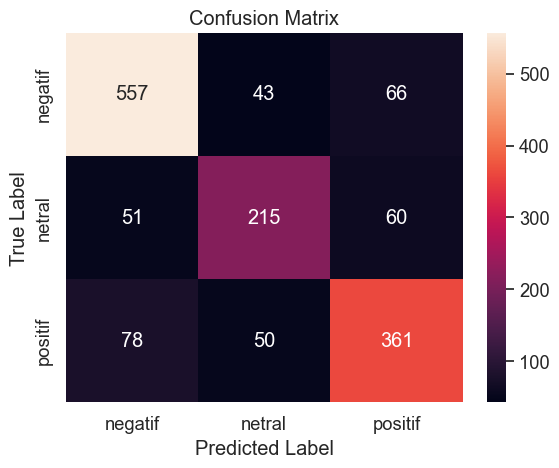

In [35]:
# Proses Pengujian
predictions_SVM = clf.predict(test_X_tfidf_10)
test_prediction_10 = pd.DataFrame()
test_prediction_10['Text'] = test_X
test_prediction_10['Label'] = predictions_SVM

# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [36]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM, average='macro'))



              precision    recall  f1-score   support

     negatif       0.81      0.84      0.82       666
      netral       0.70      0.66      0.68       326
     positif       0.74      0.74      0.74       489

    accuracy                           0.77      1481
   macro avg       0.75      0.74      0.75      1481
weighted avg       0.76      0.77      0.76      1481

Accuracy of the model :  0.7650236326806212
Precision of the model:  0.7504261338125479
Recall of the model:  0.74469561586126
F1-score of the model:  0.7473173446292934


## Kernel Poly

In [ ]:

#Menerapkan pemodelan SVM pada data train
modelpoly = SVC(kernel='poly', 
            decision_function_shape='ovr')
clfpoly = modelpoly.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Proses Pengujian
predictions_SVM_poly = clfpoly.predict(test_X_tfidf_10)

#menyimpan ke dalam dataframe
# test_prediction_8020_poly = pd.DataFrame()
# test_prediction_8020['Text'] = test_X
# test_prediction_8020['Label'] = predictions_SVM_8020_poly
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_poly), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [ ]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_poly))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_poly))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_poly, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_poly, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_poly, average='macro'))



## Kernel RBF

In [ ]:

#Menerapkan pemodelan SVM pada data train
modelRBF = SVC(kernel='rbf', 
            decision_function_shape='ovr')
clfRBF = modelRBF.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Proses Pengujian
predictions_SVM_RBF = clfRBF.predict(test_X_tfidf_10)

#menyimpan ke dalam dataframe
# test_prediction_8020_poly = pd.DataFrame()
# test_prediction_8020['Text'] = test_X
# test_prediction_8020['Label'] = predictions_SVM_8020_poly
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_RBF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [ ]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_RBF))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_RBF))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_RBF, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_RBF, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_RBF, average='macro'))



In [ ]:
print("Accuracy of the model RBF : ", accuracy_score(test_Y, predictions_SVM_RBF))
print("Accuracy of the model POLY: ", accuracy_score(test_Y, predictions_SVM_poly))
print("Accuracy of the model LINEAR: ", accuracy_score(test_Y, predictions_SVM))